<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Governo do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Tópicos Especiais em Aprendizagem de Máquina e Mineração de Dados 
### Trabalhos Práticos I e II, versão 1.1
#### Classificação de desenhos simples (Cisnes, Flamingos e Patos)

Professor _Marco Cristo_ 

**Alunos** (até 2):

 Ada Raquel dos Santos Cruz
 
 Thiago Marques Rocha

## Introdução 

Nestes trabalhos, vamoos usar o dataset do projeto Quickdraw, disponibilziado pelo Google (cf. https://quickdraw.withgoogle.com/data) para classificar imagens. No projeto Quickdraw, cerca de 15 milhões de usuários, de várias partes do mundo, iteragiram com um jogo no qual tinham que desenhar seis imagens relacionadas com cerca de 345 tópicos. Cada desenho deveria ser feito em, no máximo, vinte segundos. Uma vez que o desenho era concluído, o jogo tentava reconhecê-lo. O objetivo do projeto era compreender como seres humanos representam pictoricamente conceitos abstratos.

Nestes dois trabalhos, em particular, vamos usar o dataset do Quickdraw para criar modelos que distinguam desenhos de cisnes, flamingos e patos. Para cada imagem que iremos usar, foram coletadas a sua classe ('duck', 'flamingo' ou 'swan'), a imagem _bitmap_ (28 x 28 pixels) correspondente ao desenho e a sequência de traços (_strokes_) feitos pelo usuário ao desenhar a imagem. 

O dataset foi disponibilizado junto com este enunciado e corresponde ao arquivo `ammd2tp2018.pkl`. Este arquivo persiste uma lista com 57000 desenhos. Cada desenho corresponde a um dicionário com campos `label`, `bitmap` e `strokes`. O campo `label` pode assumir os valores 'duck', 'flamingo' ou 'swan'. O campo `bitmap` é um vetor numpy com 784 números entre 0 a 255, correspondendo aos 28x28 pixels da imagem correspondente ao desenho. O campo `strokes` é um vetor numpy com 80 linhas. Cada linha possui três colunas, _X_, _Y_ e _S_. _S_ indica a ordem do stroke desenhado ou 0, no caso de stroke inválido. O par (_X_, _Y_) corresponde aos pontos que definem o stroke. Todos os desenhos escolhidos foram reconhecidos positivamente pelo Quickdraw (ou seja, a classe certa foi advinhada por uma rede neural com uma probabilidade acima de um limiar mínimo). O código a seguir lê o dataset que vamos usar.

In [0]:
# Executar se estiver no colaboratory
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # force_remount=True

############################ IMPORTANTE ##############################
DRIVE = 'drive/My Drive/Colab Notebooks/Trabalho_1_2_AMMD_2018/'

# Se estiver executando localmente 
#DRIVE = ''
############################ FIM ##################################

Mounted at /content/drive


In [0]:
import cPickle as pickle

In [0]:
import io

with io.open('{}ammd2tp2018.pkl'.format(DRIVE), "rb") as my_input:
    dbdraw = pickle.load(my_input)

O código a seguir exibe um exemplo de desenho, tanto na forma de bitmap quanto na forma de sequência de strokes.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib.colors

# draw image as ordered sequence of strokes
def draw_strokes(test_arr):
    test_arr = test_arr[test_arr[:,2]>0, :] # only keep valid points
    un_values = np.unique(test_arr[:,2])

    n = un_values.shape[0]
    cmap = plt.get_cmap("viridis", n)

    for i in un_values:
        x = test_arr[test_arr[:,2]==i, 0]
        y = 255-test_arr[test_arr[:,2]==i, 1]
        plt.plot(x, y, '.-', color = cmap(int(i-1)))
    plt.axis('off')

    norm = matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0, n))

flamingo


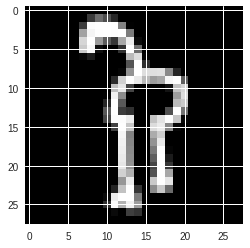

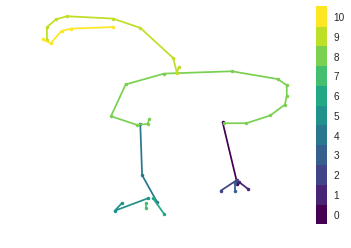

In [0]:
ridx = np.random.randint(0, 57000)
print(dbdraw[ridx]['label'])

plt.imshow(dbdraw[ridx]['bitmap'].reshape(28,28), cmap='gray')
plt.figure()
draw_strokes(dbdraw[ridx]['strokes'])

Note que o desenho é formado por vários strokes (até 15, no máximo) e um stroke é formado por vários pontos (até 80, no máximo).

## O que deve ser feito?

Você deve criar os 5 modelos a seguir para classificar os desenhos.

* __Trabalho Prático 1__
    * CNN = rede de convolução que tenha como entrada os bitmaps de 28x28 pixels;
    * CNN-D = rede sequencial (CNN Dilatada) que use como entrada os strokes;
    
    
* __Trabalho Prático 2__
    * LSTM/GRU = rede sequencial (LSTM ou GRU) que use como entrada os strokes;
    * MLP-Bit-Strokes-coders = Uma MLP que usa como entrada _embeddings_ de dimensão 30 criados pela sua CNN e seu melhor modelo, entre a CNN-D e a LSTM/GRU; 
    * MLP-Bit-Strokes-multi = Uma MLP que combina a sua CNN e seu melhor modelo, entre a CNN-D e a LSTM/GRU; 

<img src="imagens/modelos_ammd2.png" alt="" width = "600" />

Os modelos devem ser treinados com, no máximo, 54 mil imagens. Pelo menos 3 mil devem ser reservadas para validação. Os modelos sequenciais (baseados em strokes) devem apresentar desempenho de, pelo menos, 80% de acurácia. Os modelos baseados em bitmaps, pelo menos, 85% de acurácia; os combinados, pelo menos, 87% de acurácia. 

### Avaliação

Os seus modelos serão avaliados usando um segundo conjunto de três mil imagens, que não foi fornecido com este enunciado. Para tanto, deve acompanhar o notebook a ser entregue ao professor uma versão salva do modelo com código necessário para a sua avaliação no conjunto separado. Espera-se que o modelo possa ser avaliado com o comando:

```
model.evaluate(test_X, test_y, batch_size=3000)
```

Onde `test_y` corresponde a um tensor com shape (3000, 3) que representa o _hot-vector_ para as classes _duck_ (1,0,0), _flamingo_ (0,1,0) e _swan_ (0,0,1). O tensor `test_X` tem diferentes formas, dependendo do modelo a ser avaliado:

* (3000, 28, 28, 1) para a CNN;  
* (3000, 80, 3) para o modelo sequencial;  
* [(3000, 28, 28, 1), (3000, 80, 3)] para os demais modelos;  

Este trabalho corresponde a duas avaliações:

* __Trabalho Prático 1__: processamento dos dados necessários para uso + resultados da CNN e da CNN-D. 20% da nota dependerá da média dos resultados obtidos pela CNN e CNN-D na coleção de testes.
* __Trabalho Prático 2__: Modelos sequencial (LSTM/GRU) e combinados (MLP-Bit-Strokes-Coders e MLP-Bit-Strokes-Multi). 20% da nota dependerá do resultado médio obtido na coleção de testes.

### Observações

* Consulte o professor caso haja dúvidas na especificação do problema.
* Trabalho feito por, no máximo, dois alunos. Plágio não será tolerado.
* Este trabalho foi concebido para não requerer GPUs. Contudo, se disponíveis, elas podem ajudar muito ao permitir bastante exploração de parâmetros. Nos testes que fiz, usando batch_size de 1024 e 30 épocas, os modelos CNN rodaram em menos de 30 minutos em uma CPU. Com batch_size de 32 e 30 épocas, os modelos CNN-D rodaram em menos de 2 horas, o maior tempo que eu observei em todos os casos.

## Preprocessing dataset

Primeiros passos de processamento no dataset: separação de bitmap, stroke e labels. Também é feita a normalização nos bitmaps.

In [0]:
len(dbdraw)

57000

In [0]:
index = 1

print 'Features: %s' % dbdraw[index].keys()

Features: ['strokes', 'bitmap', 'label']


In [0]:
print 'Bitmap shape: %s (28x28)' % (dbdraw[index]['bitmap'].shape[0])
print 'Strokes shape: (%s x %s)' % (dbdraw[index]['strokes'].shape[0], dbdraw[index]['strokes'].shape[1])

Bitmap shape: 784 (28x28)
Strokes shape: (80 x 3)


In [0]:
bitmaps = np.array([row['bitmap'] for row in dbdraw])
strokes = np.array([row['strokes'] for row in dbdraw])
labels = np.array([row['label'] for row in dbdraw])

### Normalizar bitmap

In [0]:
bitmaps = bitmaps / 255.0

## Split into Training, Validation and Test

Divisão  do dataset em treino, validação e teste. Serão separadas 54.000 intâncias para treino, 3.000 para validação e 3.000 para teste. 

#### Total de instâncias

In [0]:
bitmaps.shape[0]

57000

In [0]:
from sklearn.model_selection import train_test_split

train_bitmap, validation_bitmap, train_bitmap_labels, validation_bitmap_labels = train_test_split(bitmaps, labels, test_size = 3000, random_state=42)
train_strokes, validation_strokes, train_strokes_labels, validation_strokes_labels = train_test_split(strokes, labels, test_size = 3000, random_state=42)

train_bitmap, test_bitmap, train_bitmap_labels, test_bitmap_labels = train_test_split(train_bitmap, train_bitmap_labels, test_size = 3000, random_state=42)
train_strokes, test_strokes, train_strokes_labels, test_strokes_labels = train_test_split(train_strokes, train_strokes_labels, test_size = 3000, random_state=42)


train_bitmap = train_bitmap.reshape((len(train_bitmap), 28, 28, 1))
test_bitmap = test_bitmap.reshape((len(test_bitmap), 28, 28, 1))
validation_bitmap = validation_bitmap.reshape((len(validation_bitmap), 28, 28, 1))

train_strokes = train_strokes.reshape((len(train_strokes), 80, 3))
test_strokes = test_strokes.reshape((len(test_strokes), 80, 3))
validation_strokes = validation_strokes.reshape((len(validation_strokes), 80, 3))


print("Bitmap")
print("Train: {}, Validation: {}, Test: {}".format(train_bitmap.shape[0], validation_bitmap.shape[0], test_bitmap.shape[0]))
print("Strokes")
print("Train: {}, Validation: {}, Test: {}".format(train_strokes.shape[0], test_strokes.shape[0], test_strokes.shape[0]))

Bitmap
Train: 51000, Validation: 3000, Test: 3000
Strokes
Train: 51000, Validation: 3000, Test: 3000


In [0]:
train_bitmap[:1].shape

(1, 28, 28, 1)

In [0]:
train_strokes[:1].shape

(1, 80, 3)

In [0]:
train_bitmap_labels[:10]

array(['duck', 'swan', 'flamingo', 'swan', 'swan', 'duck', 'swan',
       'flamingo', 'flamingo', 'flamingo'], dtype='|S8')

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Bitmap
train_bitmap_labels = encoder.fit_transform(train_bitmap_labels)
train_bitmap_labels = to_categorical(train_bitmap_labels)

test_bitmap_labels = encoder.fit_transform(test_bitmap_labels)
test_bitmap_labels = to_categorical(test_bitmap_labels)

# Strokes
train_strokes_labels = encoder.fit_transform(train_strokes_labels)
train_strokes_labels = to_categorical(train_strokes_labels)

test_strokes_labels = encoder.fit_transform(test_strokes_labels)
test_strokes_labels = to_categorical(test_strokes_labels)

# Validation
validation_bitmap_labels = encoder.fit_transform(validation_bitmap_labels)
validation_bitmap_labels = to_categorical(validation_bitmap_labels)

validation_strokes_labels = encoder.fit_transform(validation_strokes_labels)
validation_strokes_labels = to_categorical(validation_strokes_labels)

Using TensorFlow backend.


In [0]:
train_bitmap_labels[:10]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# Métodos auxiliares

A seguir, serão definidos  alguns métodos para visualizar resultados, função de perda, carregar e salvar os modelos que serão utilizados durante a execução dos experimentos.

In [0]:
from keras.models import model_from_json

DIR = 'drive/My Drive/Colab Notebooks/Trabalho_1_2_AMMD_2018'

#### Plot results

In [0]:
def plot_loss(h):
  plt.plot(h.history['loss'], label='training')
  plt.plot(h.history['val_loss'], label='validation')
  plt.legend()
  plt.show()

In [0]:
def plot_result(models, names, title):
  for model, name in zip(models, names):
    plt.plot(model.history['val_acc'], label=name)
  plt.title(title)
  plt.legend()
  plt.show()

#### Save the model

In [0]:
def save_model(model, name):
  m_dir = os.path.join(DIR, 'modelos')
  if not os.path.exists(m_dir):
    os.mkdir(m_dir)
  # serialize model to JSON
  model_json = model.to_json()
  with open(os.path.join(m_dir, "model_{}.json".format(name)), 'w') as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(os.path.join(m_dir, "model_{}.h5".format(name)))
  print("Saved model to disk")

In [0]:
def load_model(name):
  m_dir = os.path.join(DIR, 'modelos')
  # load json and create model
  json_file = open(os.path.join(m_dir, "model_{}.json".format(name)), 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(os.path.join(m_dir, "model_{}.h5".format(name)))
  print("Loaded model from disk")
  return loaded_model

#### Save the results

In [0]:
import os

def save_result(h, name):
  r_dir = os.path.join(DIR, 'resultados')
  if not os.path.exists(r_dir):
    os.mkdir(r_dir)
  with open(os.path.join(r_dir, name + '.pkl'), 'wb') as f:
     pickle.dump(h, f)

In [0]:
def load_result(name):
  with open(os.path.join(DIR, 'resultados', name + '.pkl'), 'r') as f:
     return pickle.load(f)

# Trabalho 1

## CNN to bitmap 28 x 28

Arquitetura com duas camadas de convolução e duas camada densa.

- Conv2d: filtros 8 e 16, kernels (3,3) e strides (2,2)
- Densa: 64 e 3 neurônios

In [0]:
import keras.backend as K
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from keras.models import Model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
K.clear_session()

In [0]:
def cnn_model():

  input_bitmap = Input(shape = (28, 28, 1), name='bitmap')

  x = Conv2D(8, (3, 3), activation = 'relu')(input_bitmap)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation = 'relu', strides = (2, 2), padding = 'same')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D((2, 2), padding = 'same')(x)

  x = Flatten()(x)
  x = Dropout(0.25)(x)
  x = Dense(64)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)
  yhat = Dense(3, activation = 'softmax')(x)

  model = Model(inputs = input_bitmap, outputs = yhat)

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bitmap (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
__________

#### 20 épocas

In [0]:
%%time

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = model.fit(train_bitmap, train_bitmap_labels, epochs=20, batch_size = 1024, 
              callbacks = [early], validation_data=(validation_bitmap, validation_bitmap_labels), verbose=1) 

Train on 51000 samples, validate on 3000 samples
Epoch 1/20
51000/51000 [==============================] - 5s 106us/step - loss: 0.7133 - acc: 0.7040 - val_loss: 0.5496 - val_acc: 0.7897
Epoch 2/20
51000/51000 [==============================] - 2s 34us/step - loss: 0.5135 - acc: 0.7949 - val_loss: 0.4854 - val_acc: 0.8083
Epoch 3/20
51000/51000 [==============================] - 2s 35us/step - loss: 0.4748 - acc: 0.8138 - val_loss: 0.4544 - val_acc: 0.8203
Epoch 4/20
51000/51000 [==============================] - 2s 35us/step - loss: 0.4558 - acc: 0.8237 - val_loss: 0.4291 - val_acc: 0.8333
Epoch 5/20
51000/51000 [==============================] - 2s 34us/step - loss: 0.4398 - acc: 0.8279 - val_loss: 0.4038 - val_acc: 0.8440
Epoch 6/20
51000/51000 [==============================] - 2s 35us/step - loss: 0.4288 - acc: 0.8353 - val_loss: 0.3956 - val_acc: 0.8473
Epoch 7/20
51000/51000 [==============================] - 2s 34us/step - loss: 0.4159 - acc: 0.8397 - val_loss: 0.3839 - val_acc

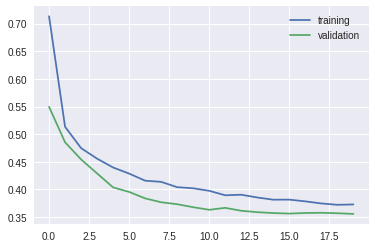

In [0]:
plot_loss(h)

Os resultados mostram que o modelo ainda tem capacidade para melhorar. Se adicionarmos mais **épocas**, por exemplo, o modelo pode convergir e alcançar melhores resutados. 

In [0]:
name = 'cnn_20epoch'
save_model(model, name)
save_result(h, name)

#### 100 épocas

In [0]:
%%time

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = model.fit(train_bitmap, train_bitmap_labels, epochs=100, batch_size = 1024, 
              callbacks = [early], validation_data=(validation_bitmap, validation_bitmap_labels), verbose=1) 

Train on 51000 samples, validate on 3000 samples
Epoch 1/100
51000/51000 [==============================] - 5s 105us/step - loss: 0.6942 - acc: 0.7083 - val_loss: 0.5337 - val_acc: 0.7940
Epoch 2/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.5073 - acc: 0.7982 - val_loss: 0.4653 - val_acc: 0.8213
Epoch 3/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.4732 - acc: 0.8139 - val_loss: 0.4265 - val_acc: 0.8340
Epoch 4/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.4571 - acc: 0.8217 - val_loss: 0.4061 - val_acc: 0.8427
Epoch 5/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.4367 - acc: 0.8314 - val_loss: 0.3932 - val_acc: 0.8457
Epoch 6/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.4286 - acc: 0.8344 - val_loss: 0.3862 - val_acc: 0.8463
Epoch 7/100
51000/51000 [==============================] - 2s 34us/step - loss: 0.4166 - acc: 0.8410 - val_loss: 0.3824 - 

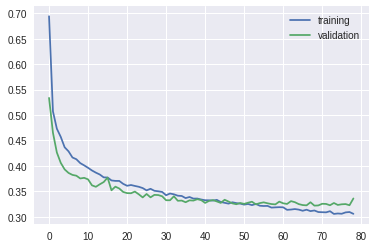

In [0]:
plot_loss(h)

A hipótese de que a adição de mais épocas melhoraria os resultados foram confirmadas. A acurácia passou de 86% (20 épocas) para 87% (100 épocas), e covergiu aproximadamente na época 40.

## CNN to bitmaps > Modelo 2

Arquitetura de duas convoluções e duas camadas densas, semelhante ao primeiro modelo, com a diferença na quantidade de filtros e neurônios nas camadas.

- Conv2D: Filtros de 32 e 64, kernels (3,3) e strides (2, 2)
- Densa: 128 e 3 neurônios


In [0]:
import keras.backend as K
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping

In [0]:
def cnn_model2():
  input_bitmap = Input(shape = (28, 28, 1))
  x = Conv2D(32, (3, 3), activation = 'relu')(input_bitmap)
  x = Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', activation = 'relu')(x)
  x = MaxPooling2D((2, 2), padding = 'same')(x)
  x = Flatten()(x)
  x = Dropout(0.25)(x)
  x = Dense(128, activation = 'relu', name = 'FC1')(x)
  x = Dropout(0.5)(x)
  yhat = Dense(3, activation = 'softmax', name = 'output')(x)

  model2 = Model(inputs = input_bitmap, outputs = yhat)

  model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model2

model2 = cnn_model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3136)              0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               401536    
__________

###20 épocas

In [0]:
%%time

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = model2.fit(train_bitmap, train_bitmap_labels, epochs=20, batch_size = 1024, 
              callbacks = [early], validation_data=(validation_bitmap, validation_bitmap_labels), verbose=1) 

Train on 51000 samples, validate on 3000 samples
Epoch 1/20
51000/51000 [==============================] - 4s 78us/step - loss: 0.5798 - acc: 0.7605 - val_loss: 0.4708 - val_acc: 0.8150
Epoch 2/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.4505 - acc: 0.8246 - val_loss: 0.4093 - val_acc: 0.8367
Epoch 3/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.4091 - acc: 0.8438 - val_loss: 0.3891 - val_acc: 0.8487
Epoch 4/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.3911 - acc: 0.8515 - val_loss: 0.3739 - val_acc: 0.8530
Epoch 5/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.3762 - acc: 0.8580 - val_loss: 0.3586 - val_acc: 0.8623
Epoch 6/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.3612 - acc: 0.8647 - val_loss: 0.3499 - val_acc: 0.8620
Epoch 7/20
51000/51000 [==============================] - 3s 61us/step - loss: 0.3484 - acc: 0.8676 - val_loss: 0.3414 - val_acc:

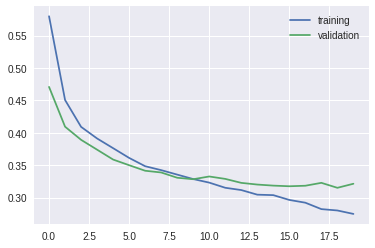

In [0]:
plot_loss(h)

Ao aumentarmos a quantidade de filtros, o modelo convergiu em poucas épocas, apresentando um resultado de 87% de acurácia desde as primeiras épocas. Este modelo convergiu em 7 épocas. 

In [0]:
name = 'cnn2_20epoch'
save_model(model2, name)
save_result(h, name)

Saved model to disk


## CNN > Modelo 3

Este terceiro modelo é uma arquitetura extraída de https://blog.waya.ai/deep-residual-learning-9610bb62c355, que utiliza uma estrutura residual, para compartilhar recurso e tornar o fluxo do gradiente mais fácil. No bloco residual, são realizadas duas convoluções sobre a entrada, gerando como saída um *embedding* final. Em seguida, este é combinado com a entrada novamente.



In [0]:
import keras.backend as K
from keras.layers import Input, Dense, BatchNormalization, Conv2D, GlobalMaxPooling2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping

In [0]:
from keras import layers
# https://blog.waya.ai/deep-residual-learning-9610bb62c355
def residual_block(y, nb_channels, _strides=(1, 1), _project_shortcut=False):
    shortcut = y

    # down-sampling is performed with a stride of 2
    y = layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
    y = layers.BatchNormalization()(y)
    y = layers.LeakyReLU()(y)

    y = layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=(1, 1), padding='same')(y)
    y = layers.BatchNormalization()(y)

    # identity shortcuts used directly when the input and output are of the same dimensions
    if _project_shortcut or _strides != (1, 1):
        # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
        # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
        shortcut = layers.Conv2D(nb_channels, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    y = layers.add([shortcut, y])
    y = layers.LeakyReLU()(y)

    return y

In [0]:
K.clear_session()

input_bitmap = Input(shape = (28, 28, 1), name='bitmap')

x = Conv2D(32, (3, 3), activation = 'relu', padding='same')(input_bitmap)

x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)

x = MaxPooling2D((3, 3), padding='same')(x)

x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)

x = MaxPooling2D((4, 4), padding='same')(x)

x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(9)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
yhat = Dense(3, activation = 'softmax')(x)

model = Model(inputs = input_bitmap, outputs = yhat)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
              
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bitmap (InputLayer)             (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         bitmap[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 32)   128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
leaky_re_l

### 20 épocas

In [0]:
%%time

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = model.fit(train_bitmap, train_bitmap_labels, epochs=20, batch_size = 1024, 
              callbacks = [early], validation_data=(validation_bitmap, validation_bitmap_labels), verbose=1) 

Train on 51000 samples, validate on 3000 samples
Epoch 1/20
51000/51000 [==============================] - 39s 772us/step - loss: 0.6586 - acc: 0.7399 - val_loss: 0.4055 - val_acc: 0.8570
Epoch 2/20
51000/51000 [==============================] - 32s 635us/step - loss: 0.4561 - acc: 0.8538 - val_loss: 0.4738 - val_acc: 0.8220
Epoch 3/20
51000/51000 [==============================] - 32s 634us/step - loss: 0.4053 - acc: 0.8699 - val_loss: 0.3803 - val_acc: 0.8597
Epoch 4/20
51000/51000 [==============================] - 32s 634us/step - loss: 0.3775 - acc: 0.8771 - val_loss: 0.3762 - val_acc: 0.8577
Epoch 5/20
51000/51000 [==============================] - 32s 634us/step - loss: 0.3571 - acc: 0.8823 - val_loss: 0.3202 - val_acc: 0.8820
Epoch 6/20
51000/51000 [==============================] - 32s 634us/step - loss: 0.3435 - acc: 0.8880 - val_loss: 0.3352 - val_acc: 0.8680
Epoch 7/20
51000/51000 [==============================] - 32s 634us/step - loss: 0.3226 - acc: 0.8923 - val_loss: 0.3

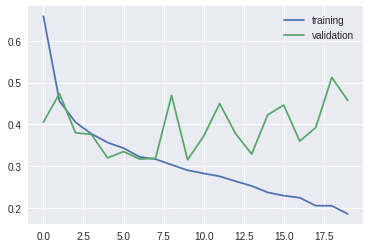

In [0]:
plot_loss(h)

O modelo obteve 87% de acurácia no máximo, o mesmo resultado obtido pelo modelo mais simples (sem o recurso residual) apresentado anteriormente. Com 5 épocas este modelo parece ter convergido. Portanto, a estrutura residual não teve tanto efeito a ponto de superar o melhor resultado.

In [0]:
name = 'cnn3_20epoch'
save_model(model, name)
save_result(h, name)

Saved model to disk


## CNN-D to strokes 80x3

In [0]:
from keras import backend as K
K.clear_session()

from keras.layers import Conv1D, Input, Add, Activation, Dropout, Dense, Flatten #, Merge
from keras.models import Sequential, Model
from keras.regularizers import l2
from keras.initializers import TruncatedNormal
from keras.layers.advanced_activations import LeakyReLU, ELU
from keras import optimizers

In [0]:
def DC_CNN_Block(nb_filter, filter_length, dilation, l2_layer_reg):
    def block(block_input):        
        residual =    block_input
        
        layer_out =   Conv1D(filters=nb_filter, kernel_size=filter_length, 
                      dilation_rate=dilation, 
                      activation='linear', padding='causal', use_bias=False,
                      kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, 
                      seed=42), kernel_regularizer=l2(l2_layer_reg))(block_input)                    
        selu_out =    Activation('selu')(layer_out)
        
        skip_out =    Conv1D(1,1, activation='linear', use_bias=False, 
                      kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, 
                      seed=42), kernel_regularizer=l2(l2_layer_reg))(selu_out)
        
        c1x1_out =    Conv1D(1,1, activation='linear', use_bias=False, 
                      kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, 
                      seed=42), kernel_regularizer=l2(l2_layer_reg))(selu_out)
                      
        block_out =   Add()([residual, c1x1_out])
        
        return block_out, skip_out
    return block

In [0]:
def DC_CNN_Model(length):
    visible = Input(shape=(length))
    
    l1a, l1b = DC_CNN_Block(32,2,1,0.001)(visible)    
    l2a, l2b = DC_CNN_Block(32,2,2,0.001)(l1a) 
    l3a, l3b = DC_CNN_Block(32,2,4,0.001)(l2a)
    l4a, l4b = DC_CNN_Block(32,2,8,0.001)(l3a)
    l5a, l5b = DC_CNN_Block(32,2,16,0.001)(l4a)
    l6a, l6b = DC_CNN_Block(32,2,32,0.001)(l5a)
    l7a, l7b = DC_CNN_Block(32,2,64,0.001)(l6a)

    l8 =   Add()([l1b, l2b, l3b, l4b, l5b, l6b, l7b])  
    
    l9 =   Activation('relu')(l8)
           
    yhat_dc_cnn =  Conv1D(1,1, activation='linear', use_bias=False, 
            kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=42),
            kernel_regularizer=l2(0.001))(l9)
    
    x = Flatten()(yhat_dc_cnn)
    yhat_dc_cnn = Dense(3, activation = 'softmax', name = 'output')(x)

    model = Model(inputs=visible, outputs=yhat_dc_cnn)
    
    model.summary()
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)

    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

### 30 épocas > batch 32

In [0]:
%%time 

length = train_strokes[0].shape
dc_model = DC_CNN_Model(length)

h = dc_model.fit(train_strokes, train_strokes_labels, epochs=30, batch_size = 32, validation_data=(validation_strokes, validation_strokes_labels), verbose=1)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 80, 32)       192         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 80, 32)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 80, 1)        32          activation_1[0][0]               
__________________________________________________________________________________________________
add_1 (Add

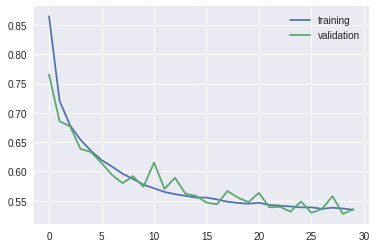

In [0]:
plot_loss(h)

In [0]:
name = 'cnndc_30epoch_32batch'
save_model(dc_model, name)
save_result(h, name)

Saved model to disk


#### 30 épocas

In [0]:
%%time 

length = train_strokes[0].shape
dc_model = DC_CNN_Model(length)

h = dc_model.fit(train_strokes, train_strokes_labels, epochs=30, batch_size = 1024, validation_data=(validation_strokes, validation_strokes_labels), verbose=1)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
conv1d_67 (Conv1D)              (None, 80, 32)       192         input_4[0][0]                    
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 80, 32)       0           conv1d_67[0][0]                  
__________________________________________________________________________________________________
conv1d_69 (Conv1D)              (None, 80, 1)        32          activation_25[0][0]              
__________________________________________________________________________________________________
add_25 (Ad

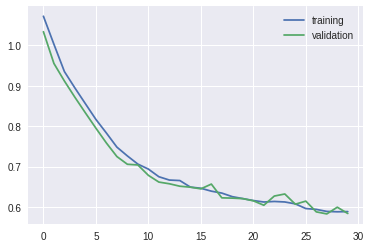

In [0]:
plot_loss(h)

Com poucas épocas, o modelo apresenta uma tendência a melhorar. A acurácia ficou com 76%, mas ainda há espaço para avaliar o modelo com mais épocas.

In [0]:
name = 'cnndc_30epoch'
save_model(dc_model, name)
save_result(h, name)

Saved model to disk


### 100 épocas

In [0]:
%%time 

length = train_strokes[0].shape
dc_model = DC_CNN_Model(length)

h = dc_model.fit(train_strokes, train_strokes_labels, epochs=100, batch_size = 1024, validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 80, 32)       192         input_2[0][0]                    
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 80, 32)       0           conv1d_23[0][0]                  
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 80, 1)        32          activation_9[0][0]               
__________________________________________________________________________________________________
add_9 (Add

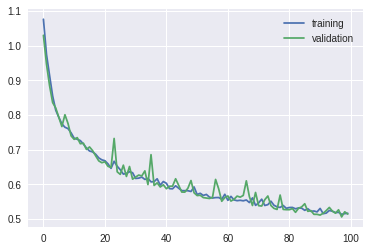

In [0]:
plot_loss(h)

O modelo apresenta características de que pode melhorar se fosse treinado muito mais. Tanto no treino quanto na validação o erro está sendo reduzido conjuntamente, mostrando que o modelo está apredendo a generalizar bem e gerando boas classificações no mundo real.

In [0]:
name = 'cnndc_100epoch'
save_model(dc_model, name)
save_result(h, name)

Saved model to disk


### 1000 épocas

In [0]:
%%time 

length = train_strokes[0].shape
dc_model = DC_CNN_Model(length)

h = dc_model.fit(train_strokes, train_strokes_labels, epochs=1000, batch_size = 1024, validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
conv1d_45 (Conv1D)              (None, 80, 32)       192         input_3[0][0]                    
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 80, 32)       0           conv1d_45[0][0]                  
__________________________________________________________________________________________________
conv1d_47 (Conv1D)              (None, 80, 1)        32          activation_17[0][0]              
__________________________________________________________________________________________________
add_17 (Ad

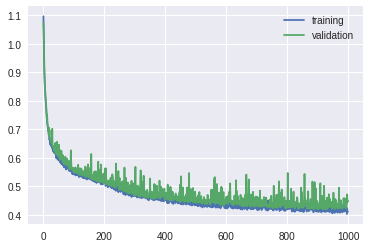

In [0]:
plot_loss(h)

Treinando com 1000 épocas, o modelo ficou com 83% de acurácia para os strokes. Diferente do bitmap, os strokes possuem uma natureza temporal, onde a sequência dos dados é importante. Um comportamento importante nos resultados foi a redução do erro tanto no treino quanto na validação, o modelo consegue reduzir nos dois casos, a cada época diminuir a diferença entre o real e o previsto. A partir da época 500, o modelo parece ter ficado preso em um mínimo local, não conseguindo reduzir mais do que 0.4 o valor da função de perda. 

In [0]:
name = 'cnndc_1000epoch'
save_model(dc_model, name)
save_result(h, name)

Saved model to disk


# Trabalho 2

Nesta segunda parte serão executados os modelos temporais para os strokes como LSTM, BI-LSTM e GRU.

## LSTM

Uma rede de LSTMs encadeadas que gera um previsão a cada tempo T. No final, combina-se as previsões em uma única representação, forçando o modelo a prestar atenção em todas as previsões, extraíndo de cada uma a informação mais representativa (GlobalMaxPolling).

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, GlobalMaxPooling1D
from keras import backend as K
from keras.callbacks import EarlyStopping

K.clear_session()

In [0]:
def lstm_model():
  length_shape = train_strokes.shape[1:]
  neurons = 160

  visible = Input(shape=length_shape, name='strokes')
  hidden = LSTM(neurons, return_sequences=True)(visible)
  hidden = LSTM(neurons, return_sequences=True)(hidden)
  hidden = GlobalMaxPooling1D()(hidden)
  hidden = Dense(neurons // 2, activation='relu', name='lstm_dense_80')(hidden)
  output = Dense(3, activation = 'softmax', name = 'lstm_output')(hidden)
  lstm_model = Model(inputs = visible, outputs = output)

  lstm_model.summary()

  lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return lstm_model
  
lstm_model = lstm_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
strokes (InputLayer)         (None, 80, 3)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 160)           104960    
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 160)           205440    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 160)               0         
_________________________________________________________________
lstm_dense_80 (Dense)        (None, 80)                12880     
_________________________________________________________________
lstm_output (Dense)          (None, 3)                 243       
Total params: 323,523
Trainable params: 323,523
Non-trainable params: 0
_________________________________________________________________


#### 30 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = lstm_model.fit(train_strokes, train_strokes_labels, epochs=30, 
                   batch_size = 1024, callbacks=[early], 
                   validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

Train on 51000 samples, validate on 3000 samples
Epoch 1/30
51000/51000 [==============================] - 28s 541us/step - loss: 0.7818 - acc: 0.6505 - val_loss: 0.6016 - val_acc: 0.7557
Epoch 2/30
51000/51000 [==============================] - 26s 512us/step - loss: 0.5418 - acc: 0.7817 - val_loss: 0.5232 - val_acc: 0.7953
Epoch 3/30
51000/51000 [==============================] - 26s 514us/step - loss: 0.4737 - acc: 0.8110 - val_loss: 0.4582 - val_acc: 0.8217
Epoch 4/30
51000/51000 [==============================] - 26s 513us/step - loss: 0.4405 - acc: 0.8256 - val_loss: 0.4506 - val_acc: 0.8193
Epoch 5/30
51000/51000 [==============================] - 26s 515us/step - loss: 0.4226 - acc: 0.8334 - val_loss: 0.4048 - val_acc: 0.8430
Epoch 6/30
51000/51000 [==============================] - 26s 515us/step - loss: 0.3863 - acc: 0.8499 - val_loss: 0.3978 - val_acc: 0.8483
Epoch 7/30
51000/51000 [==============================] - 26s 515us/step - loss: 0.3759 - acc: 0.8518 - val_loss: 0.3

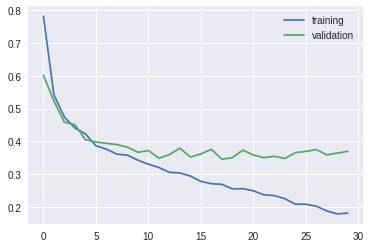

In [0]:
plot_loss(h)

Com LSTMs encadeadas o resultado para os strokes foi de 75% para 86%, um ganho significativo. Diferentemente da rede dilatada, este modelo com poucas épocas convergiu e alcançou o melhor resultado. Observa-se que a partir de 5 épocas, as curvas de treino e validação se distanciam cada vez mais.

In [0]:
name = 'lstm_30epoch'
save_model(lstm_model, name)
save_result(h, name)

Saved model to disk


## Bi-LSTM

Esta arquitetura possui 80 nós LSTMs encadeados em duas direções e conectados.

In [0]:
%%time

from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional

def bilstm_model(input_shape):
  number_lstm_units = 80
  rate_drop_lstm = 0.2
  recurrent_dropout = 0

  sequence_input = Input(shape=(input_shape), name='Input')

  # Creating LSTM Encoder
  bilstm_layer = Bidirectional(LSTM(number_lstm_units, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))

  x = bilstm_layer(sequence_input)

  layer = Activation('relu')(x)
  
  output = Dense(3, activation = 'softmax', name = 'bilstm_output')(layer)

  bilstm_model = Model(inputs=[sequence_input], outputs=[output], name = 'BiLstmModel') # inputs=visible
  bilstm_model.summary()
  
  bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return bilstm_model

bilstm_model = bilstm_model(input_shape=train_strokes.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 80, 3)             0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 160)               53760     
_________________________________________________________________
activation_1 (Activation)    (None, 160)               0         
_________________________________________________________________
bilstm_output (Dense)        (None, 3)                 483       
Total params: 54,243
Trainable params: 54,243
Non-trainable params: 0
_________________________________________________________________
CPU times: user 1.18 s, sys: 135 ms, total: 1.31 s
Wall time: 1.13 s


### 30 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h = bilstm_model.fit(train_strokes, train_strokes_labels, epochs=30, 
                   batch_size = 1024, callbacks=[early], 
                   validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

Train on 51000 samples, validate on 3000 samples
Epoch 1/30
51000/51000 [==============================] - 25s 488us/step - loss: 1.0497 - acc: 0.4484 - val_loss: 0.9604 - val_acc: 0.5630
Epoch 2/30
51000/51000 [==============================] - 23s 455us/step - loss: 0.9666 - acc: 0.5385 - val_loss: 0.8604 - val_acc: 0.6037
Epoch 3/30
51000/51000 [==============================] - 23s 454us/step - loss: 0.8967 - acc: 0.5843 - val_loss: 0.7879 - val_acc: 0.6473
Epoch 4/30
51000/51000 [==============================] - 23s 453us/step - loss: 0.8424 - acc: 0.6263 - val_loss: 0.7410 - val_acc: 0.6807
Epoch 5/30
51000/51000 [==============================] - 23s 453us/step - loss: 0.8020 - acc: 0.6503 - val_loss: 0.7009 - val_acc: 0.6967
Epoch 6/30
51000/51000 [==============================] - 23s 453us/step - loss: 0.7674 - acc: 0.6699 - val_loss: 0.7245 - val_acc: 0.6833
Epoch 7/30
51000/51000 [==============================] - 23s 451us/step - loss: 0.7433 - acc: 0.6816 - val_loss: 0.7

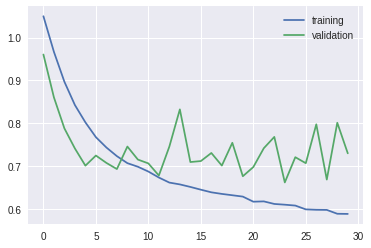

In [0]:
plot_loss(h)

Com este modelo em duas direções, o melhor resultado ficou em 72% em uma das épocas, processando os strokes. Com 6 épocas o modelo alcançou o melhor resultado e começou a entrar em overffiting. 

In [0]:
name = 'bilstm_30epoch'
save_model(bilstm_model, name)
save_result(h, name)

Saved model to disk


## LSTM (Modelo 2)

Esta arquitetura conecta 32 nós LSTMs, utilizando somente a representação final gerada pelo útlimo nó da rede. Com isso, espera-se que esta representação seja os *embeddings* da ave interpretado a partir dos strokes. 

In [0]:
def lstm_model2():
  length_shape = train_strokes.shape[1:]
  neurons = 32

  visible = Input(shape=length_shape, name='strokes')
  hidden = LSTM(neurons, return_sequences=False)(visible)
  output = Dense(3, activation = 'softmax', name = 'output')(hidden)
  lstm_model2 = Model(inputs = visible, outputs = output)

  lstm_model2.summary()

  lstm_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return lstm_model2

### 30 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

lstm_model2 = lstm_model2()

h = lstm_model2.fit(train_strokes, train_strokes_labels, epochs=30, batch_size = 1024, callbacks=[early], validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

Train on 51000 samples, validate on 3000 samples
Epoch 1/30
51000/51000 [==============================] - 12s 242us/step - loss: 1.0608 - acc: 0.4255 - val_loss: 0.9748 - val_acc: 0.5210
Epoch 2/30
51000/51000 [==============================] - 11s 216us/step - loss: 0.9012 - acc: 0.5519 - val_loss: 0.8674 - val_acc: 0.5550
Epoch 3/30
51000/51000 [==============================] - 11s 216us/step - loss: 0.8489 - acc: 0.5846 - val_loss: 0.8477 - val_acc: 0.5767
Epoch 4/30
51000/51000 [==============================] - 11s 217us/step - loss: 0.8321 - acc: 0.6019 - val_loss: 0.8349 - val_acc: 0.6057
Epoch 5/30
51000/51000 [==============================] - 11s 216us/step - loss: 0.7950 - acc: 0.6296 - val_loss: 0.8055 - val_acc: 0.6380
Epoch 6/30
51000/51000 [==============================] - 11s 215us/step - loss: 0.7645 - acc: 0.6609 - val_loss: 0.7405 - val_acc: 0.6837
Epoch 7/30
51000/51000 [==============================] - 11s 216us/step - loss: 0.7248 - acc: 0.6971 - val_loss: 0.7

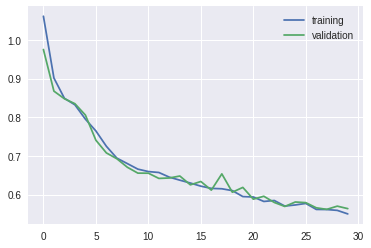

In [0]:
plot_loss(h)

Um resultado similar a rede dilatada encontrado anteriormente, aqui o modelo alcançou 77% de acurácia, demonstrando que com mais épocas talvez podesse melhorar. 

In [0]:
name = 'lstm2_30epoch'
save_model(lstm_model2, name)
save_result(h, name)

Saved model to disk


### 100 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

lstm_model2 = lstm_model2()

h = lstm_model2.fit(train_strokes, train_strokes_labels, epochs=100, batch_size = 1024, callbacks=[early], validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
strokes (InputLayer)         (None, 80, 3)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                4608      
_________________________________________________________________
output (Dense)               (None, 3)                 99        
Total params: 4,707
Trainable params: 4,707
Non-trainable params: 0
_________________________________________________________________
Train on 51000 samples, validate on 3000 samples
Epoch 1/100
51000/51000 [==============================] - 12s 238us/step - loss: 1.0672 - acc: 0.4125 - val_loss: 0.9948 - val_acc: 0.5053
Epoch 2/100
51000/51000 [==============================] - 11s 210us/step - loss: 0.9217 - acc: 0.5344 - val_loss: 0.8793 - val_acc: 0.5760
Epoch 3/100
51000/51000 [==============================] - 11s 210us/step -

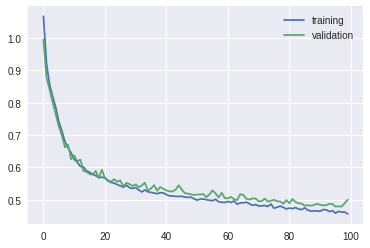

In [0]:
plot_loss(h)

In [0]:
name = 'lstm2_100epoch'
save_model(lstm_model2, name)
save_result(h, name)

Saved model to disk


As hipóteses de que o treinamento com mais épocas melhoraria os resultados foram confirmadas, e o modelo continuou reduzindo o erro entre o previsto e o real, com o resultado final em 79% na última época, mas em várias épocas apresentou 80% de acurácia, um ganho de 3 pontos percentuais em relação ao mesmo modelo treinado com 30 épocas. Pelo gráfico da função de perda é possível notar que as curvas começam a se distanciar, carcterizando o início de um overffiting.

## GRU

Um conjunto de 80 nós GRU foram utilizados nesta etapa, para utilizar a últma representação gerada no último nó da arquitetura.

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, GRU
from keras import backend as K
from keras.callbacks import EarlyStopping

In [0]:
def model_gru():
  K.clear_session()
  length_shape = train_strokes.shape[1:]
  neurons = 80

  visible = Input(shape=length_shape)
  hidden = GRU(neurons, return_sequences=False)(visible)
  output = Dense(3, activation = 'softmax', name = 'output')(hidden)
  gru_model = Model(inputs = visible, outputs = output)

  gru_model.summary()

  gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return gru_model

### 30 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

gru_model = model_gru()

h = gru_model.fit(train_strokes, train_strokes_labels, epochs=30, batch_size = 1024, callbacks=[early], validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 3)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 80)                20160     
_________________________________________________________________
output (Dense)               (None, 3)                 243       
Total params: 20,403
Trainable params: 20,403
Non-trainable params: 0
_________________________________________________________________
Train on 51000 samples, validate on 3000 samples
Epoch 1/30
51000/51000 [==============================] - 10s 201us/step - loss: 1.0790 - acc: 0.3815 - val_loss: 1.0487 - val_acc: 0.4790
Epoch 2/30
51000/51000 [==============================] - 9s 186us/step - loss: 0.9745 - acc: 0.4982 - val_loss: 0.9196 - val_acc: 0.5487
Epoch 3/30
51000/51000 [==============================] - 9s 183us/step - lo

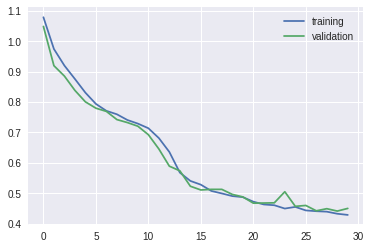

In [0]:
plot_loss(h)

Este modelo apresentou resultados superiores a LSTM com o mesmo número de células encadeadas. Com acurácia de 82% este tipo de modelo apresenta uma tendência a melhorias, se treinasse com mais épocas talvez alcançaria resultados melhores.

In [0]:
name = 'gru_30epoch'
save_model(gru_model, name)
save_result(h, name)

Saved model to disk


### 100 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

gru_model = model_gru()

h = gru_model.fit(train_strokes, train_strokes_labels, epochs=100, batch_size = 1024, callbacks=[early], validation_data=(validation_strokes, validation_strokes_labels), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 3)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 80)                20160     
_________________________________________________________________
output (Dense)               (None, 3)                 243       
Total params: 20,403
Trainable params: 20,403
Non-trainable params: 0
_________________________________________________________________
Train on 51000 samples, validate on 3000 samples
Epoch 1/100
51000/51000 [==============================] - 10s 201us/step - loss: 1.0793 - acc: 0.3833 - val_loss: 1.0129 - val_acc: 0.4753
Epoch 2/100
51000/51000 [==============================] - 9s 184us/step - loss: 0.9525 - acc: 0.5211 - val_loss: 0.9201 - val_acc: 0.5400
Epoch 3/100
51000/51000 [==============================] - 9s 183us/step -

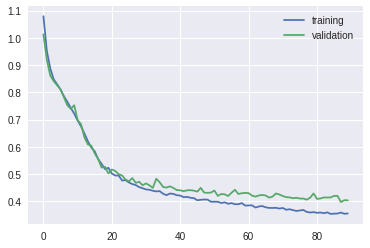

In [0]:
plot_loss(h)

O treinamento com mais épocas melhorou os resultados para 84% e a partir da época 30 em diante, o modelo começou a entrar em overfitting.

In [0]:
name = 'gru_100epoch'
save_model(gru_model, name)
save_result(h, name)

Saved model to disk


## Análise dos Resultados

Avaliar qual dos modelos foi o melhor para a tarefa de classificar as aves baseado em bitmap ou nos strokes

### Carregando os resultados

In [0]:
cnn_result = load_result('cnn_20epoch')
cnn2_result = load_result('cnn2_20epoch')
cnn3_result = load_result('cnn3_20epoch')
cnnd_result = load_result('cnndc_30epoch')
cnnd_100epoch_result = load_result('cnndc_100epoch')
bilstm_result = load_result('bilstm_30epoch')
lstm_result = load_result('lstm_30epoch')
lstm2_result = load_result('lstm2_30epoch')
lstm2_100epoch_result = load_result('lstm2_100epoch')
gru_result = load_result('gru_30epoch')
gru_100epoch_result = load_result('gru_100epoch')

### Análise para os modelos baseado em bitmap

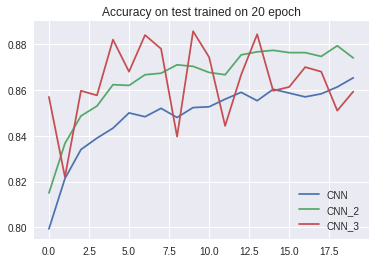

In [0]:
models = [cnn_result, cnn2_result, cnn3_result]
names = ['CNN', 'CNN_2', 'CNN_3']
title = 'Accuracy on test trained on 20 epoch'

plot_result(models, names, title)

Para os bitmaps com 20 épocas, o modelo que apresentou os melhores resultados foi o **CNN_2**, com acurácia de entre **86-88%** e uma curva mais estável que os outros. Apesar do modelo **CNN_3** também ter alcançado 88% na acurácia, o desempenho deste  é instável a cada época. Em contrapartida, o segundo modelo (CNN_2), desde as primeiras épocas já apresentava bons resultados, que foram melhorando gradativamente. Portanto, pela estabilidade, o modelo **CNN_2** foi o melhor.

### Análise para os modelos strokes

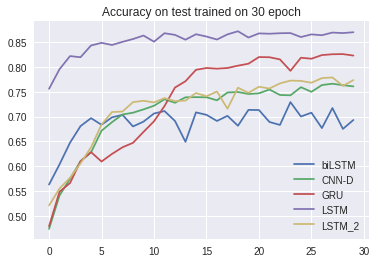

In [0]:
models = [bilstm_result, cnnd_result, gru_result, lstm_result, lstm2_result]
names = ['biLSTM', 'CNN-D', 'GRU', 'LSTM', 'LSTM_2']
title = 'Accuracy on test trained on 30 epoch'

plot_result(models, names, title)

Para os strokes com 30 épocas, o modelo que apresentou o melhor resultado  foi a **LSTM** com mecanismo de GlobalMaxPolling. Este modelo gera previsões temporárias em cada tempo T, no final todas são combinadas por meio do método GlobalMaxPolling. Os resultados mostram que a característica de um stroke é tão representativa quanto os bitmaps. Neste modelo, a acurácia alcançada foi de 85%,  resultado próximo ao alcnaçado pelo melhor modelo dos bitmaps. Com isso, espera-se que,  quando combinados (bitmaps e strokes), o modelo obtenha resultados superiores ou iguais.

#### Alguns modelos baseado em strokes treinado com 100 épocas

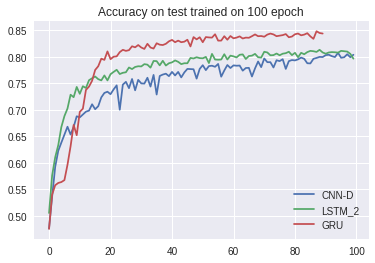

In [0]:
models = [cnnd_100epoch_result, lstm2_100epoch_result, gru_100epoch_result]
names = ['CNN-D', 'LSTM_2', 'GRU']
title = 'Accuracy on test trained on 100 epoch'

plot_result(models, names, title)

Três modelos durante o treinamento com 30 épocas apresentaram tendências a melhorias. Por esse motivo, a CNN-D, LSTM_2 e a GRU foram treinadas com mais épocas, para observar se alcançariam resultados melhores. A LSTM_2 e CNN-D, convergiram em 80% apresentando uma tendência a não melhorar mais. No caso da GRU, ela convergiu somente em 85%, alcançando o melhor resultado para os strokes que foi encontrado pela LSTM com 30 épocas. Isso mostra que alguns modelos precisam de tempo para alcançar um resultado ideal, poucas épocas pode não ser suficiente em alguns casos.

## MLP-Bit-Strokes-coders


Treina do zero a rede com as melhores redes para Bitmap e Strokes, com 10 épocas.

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dropout, Activation, Add, LSTM
from keras import backend as K
from keras.callbacks import EarlyStopping
K.clear_session()

In [0]:
def model_combined_1():
  
  # load model
  cnn_model = load_model('cnn2_20epoch')
  lstm_model = load_model('lstm_30epoch')
  
  #### CNN ####
  x_cnn = Dense(30, activation = 'softmax', name='cnn_embed')(cnn_model.get_layer('FC1').output)
  #### LSTM ###
  x_lstm = Dense(30, activation='softmax', name='lstm_embed')(lstm_model.get_layer('lstm_dense_80').output)

  # Add embeddings
  merge = Add(name='combined_model')([x_cnn, x_lstm])

  x=Dense(10, activation='relu', name='dense_10')(merge)
  yhat = Dense(3, activation = 'softmax', name = 'output')(x)

  model_final = Model(inputs=[cnn_model.input, lstm_model.input], outputs=yhat)

  model_final.summary()

  model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model_final

### 10 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

model_final = model_combined_1()

h_mlp1 = model_final.fit([train_bitmap, train_strokes], train_strokes_labels, 
                         epochs=10, batch_size = 1024, callbacks=[early], 
                         validation_data=([validation_bitmap, validation_strokes], validation_strokes_labels),
                         verbose=1)

Loaded model from disk
Loaded model from disk
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
strokes (InputLayer)            (None, 80, 3)        0                                            
_______________________________________________________________

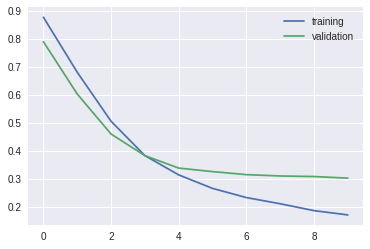

In [0]:
plot_loss(h_mlp1)

O modelo parece está no melhor resultado, com 89% de acurácia. Se continuasse treinando, provavelmente as curvas do treino e validação só se distanciariam, apesar de ambas estarem reduzindo o erro. Em 2 épocas o modelo convergiu e começou o overfitting.

In [0]:
name = 'mlpbsc_10epoch'
save_model(model_final, name)
save_result(h_mlp1, name)

Saved model to disk


## MLP-Bit-Strokes-Multi

Treina do zero a rede com as melhores redes para Bitmap e Strokes, com 10 épocas

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPool2D, \
Flatten, Dropout, Activation, Concatenate, LSTM, ReLU, Reshape
from keras import backend as K
from keras.callbacks import EarlyStopping

In [0]:
def model_combined_2():

  # load model
  cnn_model = load_model('cnn2_20epoch')
  lstm_model = load_model('lstm_30epoch')

  #Concat embeddings
  merge = Concatenate()([cnn_model.get_layer('FC1').output, lstm_model.get_layer('lstm_dense_80').output])

  #x=Dense(32, activation='relu')(merge)
  
  shape_before_lstm = K.int_shape(merge)

  #print(shape_before_lstm[1])

  neurons = shape_before_lstm[1]

  x=Dense(neurons // 2, name='combined_dense')(merge)
  x=BatchNormalization(name='combined_norm')(x)
  x=Dropout(.75, name='combined_dropout')(x)
  x=ReLU()(x)
  
  yhat = Dense(3, activation = 'softmax', name = 'output')(x)

  model_final = Model(inputs=[cnn_model.input, lstm_model.input], outputs=yhat)

  model_final.summary()

  model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  return model_final



### 10 épocas

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

model_final = model_combined_2()

h_mlp2 = model_final.fit([train_bitmap, train_strokes], train_strokes_labels, 
                         epochs=10, batch_size = 1024, callbacks=[early], 
                         validation_data=([validation_bitmap, validation_strokes], validation_strokes_labels),
                         verbose=1)

Loaded model from disk
Loaded model from disk
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
strokes (InputLayer)            (None, 80, 3)        0                                            
_______________________________________________________________

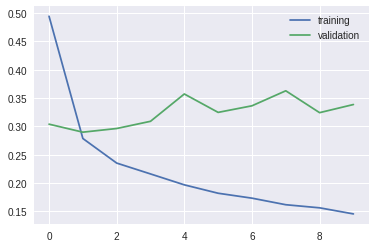

In [0]:
plot_loss(h_mlp2)

Adicionando uma MLP na camada final para ler as saídas da CNN e LSTM, para bitmap e stroke, respectivamente, tornou o modelo melhor na generalização durante a validação. O erro na validação já começou menor que o erro no treino, e com poucas épocas, o modelo permanece com acurácia de 89%.

In [0]:
name = 'mlpbsm_10epoch'
save_model(model_final, name)
save_result(h_mlp2, name)

Saved model to disk


## Transferindo e congelando aprendizado

Abaixo será transferido o aprendizado das redes individuais para bitmap e strokes. Será congelado os pesos aprendidos e treinar apenas os pesos da combinação entre redes.

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dropout, \
Activation, Concatenate, LSTM, Add, ReLU, Reshape, GlobalMaxPooling1D
from keras import backend as K
from keras.callbacks import EarlyStopping

### Congelando os pesos

#### MLP-Bit-Strokes-Coders

In [0]:
# load model
cnn_model = load_model('cnn2_20epoch')
lstm_model = load_model('lstm_30epoch')

Loaded model from disk
Loaded model from disk


In [0]:
for layer in lstm_model.layers:
  print(layer.name)
print("#############")
for layer in cnn_model.layers:
  print(layer.name)

strokes
lstm_1
lstm_2
global_max_pooling1d_1
lstm_dense_80
lstm_output
#############
input_1
conv2d_3
conv2d_4
max_pooling2d_2
flatten_2
dropout_3
FC1
dropout_4
output


In [0]:
  for layer in lstm_model.layers[:-1]:
    layer.trainable = False
  for layer in cnn_model.layers[:-2]:
    layer.trainable = False

  #### CNN ####
  x_cnn = Dense(30, activation = 'softmax', name='cnn_embed')(cnn_model.get_layer('FC1').output)
  #### LSTM ###
  x_lstm = Dense(30, activation='softmax', name='lstm_embed')(lstm_model.get_layer('lstm_dense_80').output)

  # Add embeddings
  merge = Add(name='combined_model')([x_cnn, x_lstm])

  x=Dense(10, activation='relu', name='dense_10')(merge)
  yhat = Dense(3, activation = 'softmax', name = 'output')(x)

  model_final = Model(inputs=[cnn_model.input, lstm_model.input], outputs=yhat)

  model_final.summary()

  model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
strokes (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
max_poolin

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h_mlp1 = model_final.fit([train_bitmap, train_strokes], train_strokes_labels, 
                         epochs=10, batch_size = 1024, callbacks=[early], 
                         validation_data=([validation_bitmap, validation_strokes], validation_strokes_labels),
                         verbose=1)

Train on 51000 samples, validate on 3000 samples
Epoch 1/10
51000/51000 [==============================] - 13s 251us/step - loss: 0.9468 - acc: 0.6613 - val_loss: 0.8212 - val_acc: 0.8233
Epoch 2/10
51000/51000 [==============================] - 11s 219us/step - loss: 0.6742 - acc: 0.8965 - val_loss: 0.5812 - val_acc: 0.8823
Epoch 3/10
51000/51000 [==============================] - 11s 219us/step - loss: 0.4337 - acc: 0.9388 - val_loss: 0.4201 - val_acc: 0.8917
Epoch 4/10
51000/51000 [==============================] - 11s 219us/step - loss: 0.2934 - acc: 0.9466 - val_loss: 0.3481 - val_acc: 0.8920
Epoch 5/10
51000/51000 [==============================] - 11s 219us/step - loss: 0.2223 - acc: 0.9479 - val_loss: 0.3196 - val_acc: 0.8947
Epoch 6/10
51000/51000 [==============================] - 11s 220us/step - loss: 0.1861 - acc: 0.9490 - val_loss: 0.3110 - val_acc: 0.8920
Epoch 7/10
51000/51000 [==============================] - 11s 219us/step - loss: 0.1676 - acc: 0.9512 - val_loss: 0.3

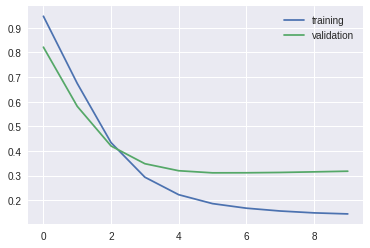

In [0]:
plot_loss(h_mlp1)

O modelo alcançou o melhor resultado em 2 épocas, congelando os pesos para os modelos baseados em bitmap e strokes, a acurácia do modelo final ficou em 89% desde as primeiras épocas, tornando o modelo mais estável.

In [0]:
name = 'mlpbsc_wf_10epoch'
save_model(model_final, name)
save_result(h_mlp1, name)

Saved model to disk


#### MLP-Bit-Strokes-Multi

In [0]:
# load model
cnn_model = load_model('cnn2_20epoch')
lstm_model = load_model('lstm_30epoch')

Loaded model from disk
Loaded model from disk


In [0]:
for layer in lstm_model.layers[:-1]:
  print(layer.name)
print("#############")
for layer in cnn_model.layers[:-2]:
  print(layer.name)

strokes
lstm_1
lstm_2
global_max_pooling1d_1
lstm_dense_80
#############
input_1
conv2d_3
conv2d_4
max_pooling2d_2
flatten_2
dropout_3
FC1


In [0]:
for layer in lstm_model.layers[:-1]:
  layer.trainable = False
  
for layer in cnn_model.layers[:-2]:
  layer.trainable = False
  
#Concat embeddings
merge = Concatenate()([cnn_model.get_layer('FC1').output, lstm_model.get_layer('lstm_dense_80').output])

shape_before_lstm = K.int_shape(merge)
neurons = shape_before_lstm[1]

x=Dense(neurons // 2, name='combined_dense')(merge)
x=BatchNormalization(name='combined_norm')(x)
x=Dropout(.75, name='combined_dropout')(x)
x=ReLU()(x)

yhat = Dense(3, activation = 'softmax', name = 'output_combined')(x)

model_final = Model(inputs=[cnn_model.input, lstm_model.input], outputs=yhat)

model_final.summary()
  
# compile the model (should be done *after* setting layers to non-trainable)
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
strokes (InputLayer)            (None, 80, 3)        0                                            
__________________________________________________________________________________________________
max_poolin

In [0]:
%%time 

early = EarlyStopping(monitor='loss', patience = 5, min_delta=0, verbose=0)

h_mlp2 = model_final.fit([train_bitmap, train_strokes], train_strokes_labels, 
                         epochs=10, batch_size = 1024, callbacks=[early], 
                         validation_data=([validation_bitmap, validation_strokes], validation_strokes_labels),
                         verbose=1)

Train on 51000 samples, validate on 3000 samples
Epoch 1/10
51000/51000 [==============================] - 17s 324us/step - loss: 0.4355 - acc: 0.8385 - val_loss: 0.3308 - val_acc: 0.8903
Epoch 2/10
51000/51000 [==============================] - 11s 221us/step - loss: 0.2060 - acc: 0.9285 - val_loss: 0.3285 - val_acc: 0.8913
Epoch 3/10
51000/51000 [==============================] - 11s 220us/step - loss: 0.1836 - acc: 0.9365 - val_loss: 0.3319 - val_acc: 0.8920
Epoch 4/10
51000/51000 [==============================] - 11s 221us/step - loss: 0.1737 - acc: 0.9406 - val_loss: 0.3372 - val_acc: 0.8923
Epoch 5/10
51000/51000 [==============================] - 11s 223us/step - loss: 0.1672 - acc: 0.9426 - val_loss: 0.3432 - val_acc: 0.8910
Epoch 6/10
51000/51000 [==============================] - 11s 222us/step - loss: 0.1601 - acc: 0.9452 - val_loss: 0.3474 - val_acc: 0.8913
Epoch 7/10
51000/51000 [==============================] - 11s 221us/step - loss: 0.1591 - acc: 0.9450 - val_loss: 0.3

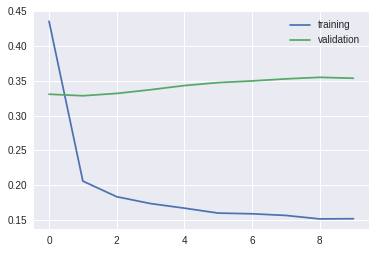

In [0]:
plot_loss(h_mlp2)

O congelamento manteve as curvas de aprendizado mais estáveis, apresentando o melhor resultado com  acurácia de 89%.

In [0]:
name = 'mlpbsm_wf_10epoch'
save_model(model_final, name)
save_result(h_mlp2, name)

Saved model to disk


## Análise dos modelos combinados

### Carregando os modelos

In [0]:
mlpbsc_result = load_result('mlpbsc_10epoch')
mlpbsm_result = load_result('mlpbsm_10epoch')
mlpbsc_wf_result = load_result('mlpbsc_wf_10epoch')
mlpbsm_wf_result = load_result('mlpbsm_wf_10epoch')

### Comparativo 

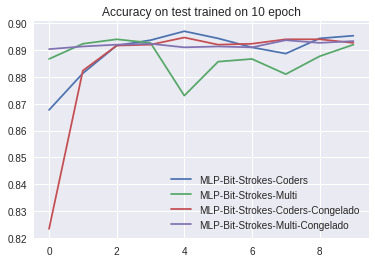

In [0]:
models = [mlpbsc_result, mlpbsm_result, mlpbsc_wf_result, mlpbsm_wf_result]
names = ['MLP-Bit-Strokes-Coders', 'MLP-Bit-Strokes-Multi', 'MLP-Bit-Strokes-Coders-Congelado', 'MLP-Bit-Strokes-Multi-Congelado']
title = 'Accuracy on test trained on 10 epoch'

plot_result(models, names, title)

Congelar os pesos das redes individuais que processavam bitmap e strokes, tornou a curva de aprendizado dos modelos combinados mais estável, em média com 89% de acurácia, desde as primeiras épocas de treinamento. O resultado deve-se ao fato de que os modelos individuais já possuiam resultados bons com esta acurácia. Portanto, o modelo combinado preservou o aprendizado dos modelos e ajustou somente os pesos da combinação.

# Avaliação dos modelos

Esta etapa é a de avaliação dos melhores modelos no conjunto de teste. O conjunto esperado de teste é de 3.000 instâncias. Um exemplo de como utilizar os modelos treinados foi adicionado a seguir, onde é demonstrado como carregar e avaliar o modelo passando o conjunto de teste, para os **cinco modelos**: CNN, CNN-D, LSTM, MLP-Bit-Strokes-Coders, MLP-Bit-Strokes-Multi

In [0]:
############################# IMPORTANTE ################################

# Definir o diretório onde será executado a leitura dos modelos pre-treinados

# Se estiver executando no colaboratory
DIR = 'drive/My Drive/Colab Notebooks/Trabalho_1_2_AMMD_2018'

# Se estiver executando localmente
# DIR = ''

############################# FIM #######################################

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dropout, \
Activation, Concatenate, LSTM, Add, ReLU
from keras import backend as K

from sklearn.metrics import confusion_matrix
import itertools
from keras.models import model_from_json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load_model(name):
  m_dir = os.path.join(DIR, 'modelos')
  # load json and create model
  json_file = open(os.path.join(m_dir, "model_{}.json".format(name)), 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(os.path.join(m_dir, "model_{}.h5".format(name)))
  print("Loaded model from disk")
  return loaded_model
    
def onehot_to_categorical(test_labels):
  def decode_to_categorical(datum):
    return np.argmax(datum)
  
  test_labels = np.array([ decode_to_categorical(test_labels[i]) for i in range(test_labels.shape[0]) ])
  return test_labels

def display_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_confusion_matrix(test_labels, y_hat):
  
    obj_categories = ['duck', 'flamingo', 'swan']
     
    # Transform one-hot to categorical
    y_hat = onehot_to_categorical(y_hat)
    test_labels = onehot_to_categorical(test_labels)
  
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(test_labels, y_hat)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    display_confusion_matrix(cnf_matrix, classes=obj_categories, normalize=True,
                          title='Normalized confusion matrix')

result = {}

## Avaliando o modelo para bitmap

Melhor modelo para processar os bitmaps.

#### CNN

In [0]:
# load model
cnn_model = load_model('cnn2_20epoch')
# evaluate loaded model on test data
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result['CNN'] = cnn_model.evaluate(test_bitmap, test_bitmap_labels, batch_size=3000)[1]
print("Acurracy", result['CNN'])

Loaded model from disk
3000/3000 [==============================] - 6s 2ms/step
('Acurracy', 0.8796666860580444)


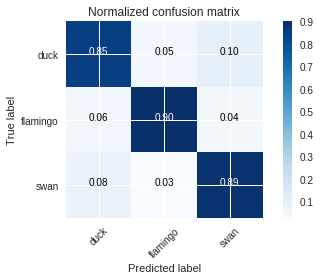

In [0]:
y_hat = cnn_model.predict(test_bitmap, batch_size=3000)
plot_confusion_matrix(test_bitmap_labels, y_hat)

## Avaliando os modelos para os strokes

Melhor modelo para representar os strokes

#### CNN-D

In [0]:
# load model
cnnd_model = load_model('cnndc_1000epoch')
# evaluate loaded model on test data
cnnd_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result['CNN-D'] = cnnd_model.evaluate(test_strokes, test_strokes_labels, batch_size=3000)[1]
print("Acurracy", result['CNN-D'])

Loaded model from disk
3000/3000 [==============================] - 6s 2ms/step
('Acurracy', 0.82833331823349)


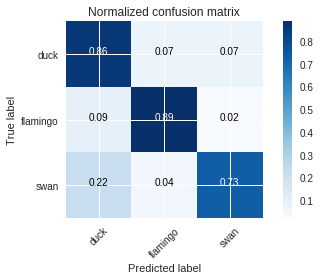

In [0]:
y_hat = cnnd_model.predict(test_strokes, batch_size=3000)
plot_confusion_matrix(test_strokes_labels, y_hat)

#### LSTM

In [0]:
# load model
lstm_model = load_model('lstm_30epoch')
# evaluate loaded model on test data
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result['LSTM'] = lstm_model.evaluate(test_strokes, test_strokes_labels, batch_size=3000)[1]
print("Acurracy", result['LSTM'])

Loaded model from disk
3000/3000 [==============================] - 7s 2ms/step
('Acurracy', 0.8553333282470703)


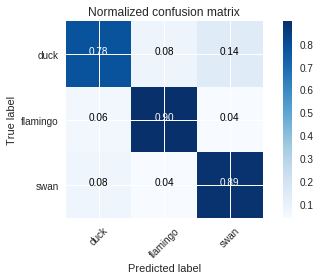

In [0]:
y_hat = lstm_model.predict(test_strokes, batch_size=3000)
plot_confusion_matrix(test_strokes_labels, y_hat)

## Avaliando os modelos combinados

O melhor modelo combinado baseado no bitmap e os strokes

#### MLP-Bit-Strokes-Coders

In [0]:
# load model
combined = load_model('mlpbsc_wf_10epoch')
# evaluate loaded model on test data
combined.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result['MLP-Bit-Strokes-Coders'] = combined.evaluate([test_bitmap, test_strokes], test_strokes_labels, batch_size=3000)[1]
print("Acurracy", result['MLP-Bit-Strokes-Coders'])

Loaded model from disk
3000/3000 [==============================] - 7s 2ms/step
('Acurracy', 0.8796666860580444)


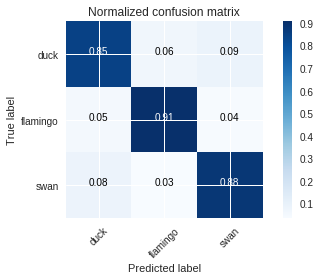

In [0]:
y_hat = combined.predict([test_bitmap, test_strokes], batch_size=3000)
plot_confusion_matrix(test_strokes_labels, y_hat)

#### MLP-Bit-Strokes-Multi

In [0]:
# load model
combined = load_model('mlpbsm_wf_10epoch')
# evaluate loaded model on test data
combined.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result['MLP-Bit-Strokes-Multi'] = combined.evaluate([test_bitmap, test_strokes], test_strokes_labels, batch_size=3000)[1]
print("Acurracy", result['MLP-Bit-Strokes-Multi'])

Loaded model from disk
3000/3000 [==============================] - 7s 2ms/step
('Acurracy', 0.8790000081062317)


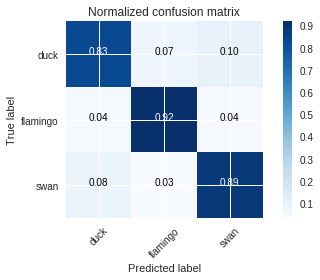

In [0]:
y_hat = combined.predict([test_bitmap, test_strokes], batch_size=3000)
plot_confusion_matrix(test_strokes_labels, y_hat)

## Resumo da avaliação

O resultado a seguir apresenta o desempenho final dos melhores modelos, tabulado em um dataframe. Basta executar a linha a seguir para visualizar os três resultados.

In [0]:
import pandas as pd

pd.DataFrame(data=[result], columns=['CNN', 'CNN-D', 'LSTM', 'MLP-Bit-Strokes-Coders', 'MLP-Bit-Strokes-Multi'], index=['Accuracy'])

,CNN,CNN-D,LSTM,MLP-Bit-Strokes-Coders,MLP-Bit-Strokes-Multi
Accuracy,0.879667,0.828333,0.855333,0.879667,0.879



O modelo combinado (MLP-Bit-Strokes-Coders e MLP-Bitmap-Strokes-Multi) apresenta o melhor resultado de 87% de acurácia. Analisando a matriz de confusão é possível notar que a classificação do modelo melhorou em todas as classes, reduzindo quase a zero o nível de incerteza do modelo. Portanto, a combinação do melhor modelo para o bitmap (CNN) e o melhor para os strokes (LSTM) impactou diretamente no modelo combinado, resultando em um modelo mais robusto a classificação das aves.

## Examinando o espaço de características 

O objetivo desta tarefa é visualizar como os modelos estão organizando o espaço de característica do bitmap e os strokes, tanto os modelos individuais, quanto os combinados

In [0]:
from sklearn.manifold import TSNE

def create_features(x_test_features):
  tsne_obj = TSNE(n_components=2,
                           init='pca',
                           random_state=101,
                           method='barnes_hut',
                           n_iter=500,
                           verbose=2)
  tsne_features = tsne_obj.fit_transform(x_test_features)
  return tsne_features

In [0]:
def decode_to_categorical(datum):
    return np.argmax(datum)
  

def plot_2d(test_labels, tsne_features):
  obj_categories = ['duck', 'flamingo', 'swan']
  colors = plt.cm.rainbow(np.linspace(0, 1, 3))
  plt.figure(figsize=(10, 10))

  # test_labels = test_bitmap_labels
  test_labels = np.array([ decode_to_categorical(test_labels[i]) for i in range(test_labels.shape[0]) ])

  for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
      plt.scatter(tsne_features[np.where(test_labels == c_group), 0],
                  tsne_features[np.where(test_labels == c_group), 1],
                  marker='o',
                  color=c_color,
                  linewidth='1',
                  alpha=0.8,
                  label=c_label)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('t-SNE on Testing Samples')
  plt.legend(loc='best')
  plt.savefig('clothes-dist.png')
  plt.show(block=False)

#### Para bitmaps

In [0]:
# load model
cnn_model = load_model('cnn2_20epoch')
# CNN model 
output = cnn_model.get_layer('FC1').output

model_final = Model(inputs=cnn_model.input, outputs=output)

model_final.summary()
  
# compile the model (should be done *after* setting layers to non-trainable)
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_test_features = model_final.predict(test_bitmap, verbose = True, batch_size=3000)

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3136)              0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)             

In [0]:
%%time
tsne_features = create_features(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.017s...


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


[t-SNE] Computed neighbors for 3000 samples in 1.922s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 1.130822
[t-SNE] Computed conditional probabilities in 0.143s
[t-SNE] Iteration 50: error = 74.4145203, gradient norm = 0.0095641 (50 iterations in 1.815s)
[t-SNE] Iteration 100: error = 74.8812943, gradient norm = 0.0014377 (50 iterations in 1.763s)
[t-SNE] Iteration 150: error = 74.8850708, gradient norm = 0.0014188 (50 iterations in 1.700s)
[t-SNE] Iteration 200: error = 74.8853073, gradient norm = 0.0002136 (50 iterations in 1.669s)
[t-SNE] Iteration 250: error = 74.8853836, gradient norm = 0.0002633 (50 iterations in 1.665s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.885384
[t-SNE] Iteration 300: error = 1.8932844, gradient norm = 0.0010023 (50 iterations in 1.199s)
[t-SNE] Iteration

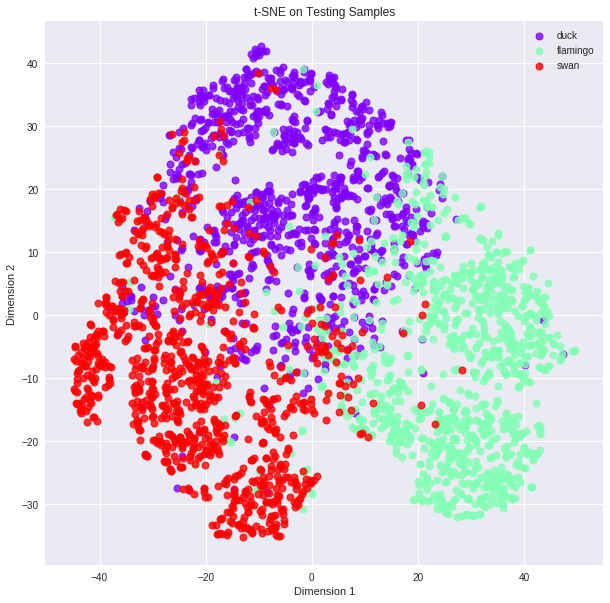

In [0]:
plot_2d(test_bitmap_labels, tsne_features)

#### Para strokes 

In [0]:
# load model
lstm_model = load_model('lstm_30epoch')
# CNN model 
output = lstm_model.get_layer('lstm_dense_80').output

model_final = Model(inputs=lstm_model.input, outputs=output)

model_final.summary()
  
# compile the model (should be done *after* setting layers to non-trainable)
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_test_features = model_final.predict(test_strokes, verbose = True, batch_size=3000)

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
strokes (InputLayer)         (None, 80, 3)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 160)           104960    
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 160)           205440    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 160)               0         
_________________________________________________________________
lstm_dense_80 (Dense)        (None, 80)                12880     
Total params: 323,280
Trainable params: 323,280
Non-trainable params: 0
_________________________________________________________________
3000/3000 [==============================] - 3s 1ms/step


In [0]:
%%time
tsne_features = create_features(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.013s...


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


[t-SNE] Computed neighbors for 3000 samples in 1.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.878099
[t-SNE] Computed conditional probabilities in 0.139s
[t-SNE] Iteration 50: error = 73.8806076, gradient norm = 0.0119479 (50 iterations in 1.416s)
[t-SNE] Iteration 100: error = 74.5990982, gradient norm = 0.0018966 (50 iterations in 1.375s)
[t-SNE] Iteration 150: error = 74.6320114, gradient norm = 0.0010038 (50 iterations in 1.294s)
[t-SNE] Iteration 200: error = 74.6365204, gradient norm = 0.0001465 (50 iterations in 1.298s)
[t-SNE] Iteration 250: error = 74.6371155, gradient norm = 0.0002362 (50 iterations in 1.289s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.637115
[t-SNE] Iteration 300: error = 1.8913537, gradient norm = 0.0009767 (50 iterations in 1.135s)
[t-SNE] Iteration

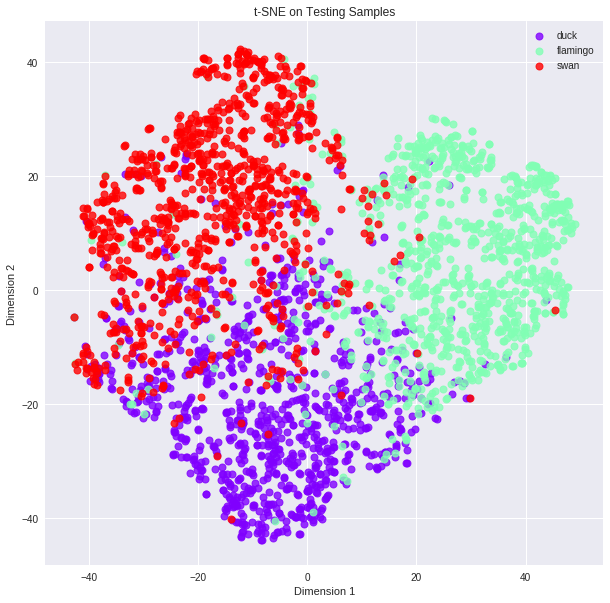

In [0]:
plot_2d(test_strokes_labels, tsne_features)

#### Para combinado

In [0]:
# load model
mlp_model = load_model('mlpbsm_wf_10epoch')
# CNN model 
output = mlp_model.get_layer('combined_dense').output

model_final = Model(inputs=mlp_model.input, outputs=output)

model_final.summary()
  
# compile the model (should be done *after* setting layers to non-trainable)
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_test_features = model_final.predict([test_bitmap, test_strokes], verbose = True, batch_size=3000)

Loaded model from disk
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
strokes (InputLayer)            (None, 80, 3)        0                                            
______________________________________________________________________________________

In [0]:
%%time
tsne_features = create_features(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.009s...


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


[t-SNE] Computed neighbors for 3000 samples in 0.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 1.330166
[t-SNE] Computed conditional probabilities in 0.145s
[t-SNE] Iteration 50: error = 64.4200821, gradient norm = 0.0397025 (50 iterations in 1.230s)
[t-SNE] Iteration 100: error = 64.9594116, gradient norm = 0.0310143 (50 iterations in 1.214s)
[t-SNE] Iteration 150: error = 64.5068512, gradient norm = 0.0306372 (50 iterations in 1.279s)
[t-SNE] Iteration 200: error = 66.3614731, gradient norm = 0.0128149 (50 iterations in 1.501s)
[t-SNE] Iteration 250: error = 66.6795883, gradient norm = 0.0116531 (50 iterations in 1.573s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.679588
[t-SNE] Iteration 300: error = 1.5488300, gradient norm = 0.0008518 (50 iterations in 1.242s)
[t-SNE] Iteration

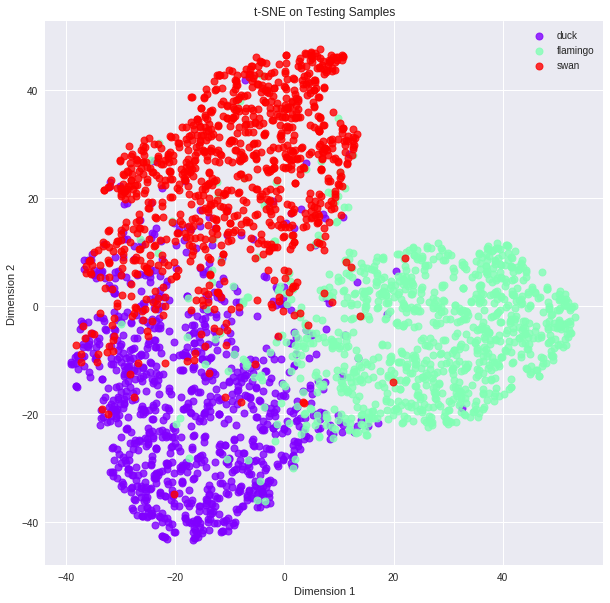

In [0]:
plot_2d(test_strokes_labels, tsne_features)

## Conclusão

Ao examinar as representações geradas pelos modelos é possível notar que o espaço de características está sendo organizado, separando os três grupos de aves. Pode ser observado que a classe duck é a que apresenta maior de interseção entre as classes flamingo e swan. Em trabalhos futuros, cabe investigar quais são as características gráficas que estas aves compartilham nos desenhos feitos a mão.


No final, o modelo combinado de classificação das aves baseado em bitmaps e strokes apresentou uma acurácia de 87%. Analisando a matriz de confusão, foi possível confirmar que o modelo, praticamente, não apresenta dúvidas sobre a classificação das três classes. Essas características demonstram que de fato o modelo aprendeu a organizar o espaço e representar as características das aves. 

# Referências

### Saving the best model

https://machinelearningmastery.com/save-load-keras-deep-learning-models/